# Time series of Water absence and presence at Validation points

## 1. Read data in WaterMapZim directory

### Read water Frequency

In [241]:
%reset -f

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import seaborn as sns
import io
import numpy as np
# df_all dataframe that contains all the points pumped and not pumped
df_all = pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/PointsValid/TSPTS_complet.csv',sep=';', header=0)
print(df_all.head(5))
PtsInfo=pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script\Kamel Python/WaterMappingInZimbabweFromLandsat-main/PointsValid/PTSinfos_complet.csv',sep=';', header=0)
df_rain = pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/ERA_Precip_Monthly.csv',sep=';', header=0)
print(df_rain.head(5))
df_EVI_NDVI = pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/NDVI_EVI_MODIS.csv',sep=';', header=0)
print(df_EVI_NDVI.head(5))
df_EVI_NDVI.info()

df_temp = (pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/ERA_Temp_Monthly.csv',sep=';', header=0))
print(df_temp.head(5))
df_temp.info()


df_ONI = (pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/ONI.csv',sep=';', header=0))


ts3 = df_rain['Rain (m)']
ts4 = df_EVI_NDVI['NDVI']
ts5 = df_temp['Temperature (K)']
# df_all.head()
# PtsInfo.head()

PtsInfo['Pump'].describe()
# print(PtsInfo.info())

<>:13: SyntaxWarning: invalid escape sequence '\K'
<>:13: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\4225775745.py:13: SyntaxWarning: invalid escape sequence '\K'
  PtsInfo=pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script\Kamel Python/WaterMappingInZimbabweFromLandsat-main/PointsValid/PTSinfos_complet.csv',sep=';', header=0)


    TimeStamp  PTS1  PTS2  PTS3  PTS4  PTS5  PTS6  PTS7  PTS8  PTS9  ...  \
0  1986-04-07   1.0   NaN   NaN   NaN   1.0   NaN   1.0   1.0   1.0  ...   
1  1986-05-25   1.0   0.0   NaN   0.0   0.0   NaN   1.0   1.0   0.0  ...   
2  1986-11-17   0.0   0.0   NaN   0.0   0.0   NaN   0.0   0.0   0.0  ...   
3  1986-12-03   1.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN  ...   
4  1987-01-04   1.0   NaN   NaN   NaN   0.0   NaN   1.0   1.0   NaN  ...   

   PTS264  PTS265  PTS266  PTS267  PTS268  PTS269  PTS270  PTS271  PTS272  \
0     NaN     1.0     1.0     NaN     NaN     1.0     NaN     0.0     NaN   
1     1.0     0.0     1.0     0.0     1.0     1.0     0.0     1.0     0.0   
2     1.0     0.0     1.0     0.0     1.0     1.0     0.0     1.0     0.0   
3     NaN     NaN     NaN     0.0     1.0     NaN     NaN     NaN     NaN   
4     1.0     NaN     NaN     0.0     1.0     NaN     NaN     NaN     0.0   

   PTS273  
0     0.0  
1     0.0  
2     0.0  
3     NaN  
4     0.0  

[5 rows

count     273
unique      2
top         N
freq      208
Name: Pump, dtype: object

### Read Pumped and not pumped points   

In [242]:
from collections import Counter
#Create a new dataframe with only the points that are not pumps
#List of pumped water points
listPumped=PtsInfo[PtsInfo['Pump'] == 'Y']
# print(listPumped.head(5))   
listNotPumped=PtsInfo[PtsInfo['Pump'] == 'N']
# print(listPumped.head(5))   
# Count the occurrences of each element
counterNP = Counter(listNotPumped)

print(counterNP)

Counter({'Waterhole': 1, 'Type': 1, 'Pump': 1, 'ID': 1, 'long': 1, 'Lat': 1, 'XUTM_WG84': 1, 'YUTM_WGS84': 1, 'PTS': 1, 'Frequency': 1})


 ### Two dataframe with pumped and not pumped points (print count)

In [243]:
# Before the intersection need to keep the date as index    
Date=df_all['TimeStamp'].astype('datetime64[ns]')   
df_all.insert(loc=0,column='Date',value=Date)   
df_all = df_all.set_index('Date')


#Create two dataframe with pumped and not pumped points 
PumpedSelection=df_all.columns.intersection(listPumped['PTS'])
dfPumped= df_all[df_all.columns.intersection(listPumped['PTS'])]
print(dfPumped.count())

NotPumpedSelection=df_all.columns.intersection(listNotPumped['PTS'])
dfNotPumped= df_all[NotPumpedSelection]
print(dfNotPumped.count())


PTS208    284
PTS209    283
PTS210    272
PTS211    271
PTS212    278
         ... 
PTS268    265
PTS269    273
PTS270    277
PTS271    273
PTS272    278
Length: 65, dtype: int64
PTS1      304
PTS2      268
PTS3        0
PTS4      281
PTS5      275
         ... 
PTS204    272
PTS205    276
PTS206    275
PTS207    261
PTS273    280
Length: 208, dtype: int64


## 2. Calculation, plots and Analysis of not pumped water ponds

### Calculation of Water Frequency : count all 'one" per point of validation for all points (not pumped) at each date, calculate mean and other statistics

In [244]:
Count_im_Point_NP=dfNotPumped.iloc[:,0:].count(axis=1)
Count_waterpres_Count_NP=dfNotPumped[dfNotPumped.iloc[:,0:]>0].count(axis=1)
# Same as above Mean_Point_Count=df.iloc[:,2:].sum(axis=1)
MeanFreq_Point_NP=dfNotPumped.iloc[:,0:].sum(axis=1)/dfNotPumped.iloc[:,0:].count(axis=1)
StdWaterpresence_Point_NP=dfNotPumped.iloc[:,0:].std(axis=1)
Q5_Point_Count_NP=dfNotPumped.iloc[:,0:].quantile(0.05,axis=1)
Q75_Point_Count_NP=dfNotPumped.iloc[:,0:].quantile(0.75,axis=1)   

# Count_Point_Count.head(5)
MeanFreq_Point_NP.head(5)    


Date
1986-04-07    0.508772
1986-05-25    0.465839
1986-11-17    0.106250
1986-12-03    0.314607
1987-01-04    0.329897
dtype: float64

In [245]:
dfNotPumped['MeanFreq_NP']=MeanFreq_Point_NP
dfNotPumped['Count_im_Point_NP']=Count_im_Point_NP
dfNotPumped['Count_waterpres_Count_NP']=Count_waterpres_Count_NP
dfNotPumped['StdWaterpresence_Point_NP']=StdWaterpresence_Point_NP
dfNotPumped['Q5_Point_Count_NP']=Q5_Point_Count_NP
dfNotPumped['Q75_Point_Count_NP']=Q75_Point_Count_NP

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2320700509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['MeanFreq_NP']=MeanFreq_Point_NP
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2320700509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['Count_im_Point_NP']=Count_im_Point_NP
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2320700509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [246]:
dfNotPumped.describe()
dfNotPumped.info(verbose=True,show_counts=True)
print(dfNotPumped.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304 entries, 1986-04-07 to 2022-11-04
Data columns (total 214 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    PTS1                       304 non-null    float64
 1    PTS2                       268 non-null    float64
 2    PTS3                       0 non-null      float64
 3    PTS4                       281 non-null    float64
 4    PTS5                       275 non-null    float64
 5    PTS6                       0 non-null      float64
 6    PTS7                       277 non-null    float64
 7    PTS8                       277 non-null    float64
 8    PTS9                       270 non-null    float64
 9    PTS10                      271 non-null    float64
 10   PTS11                      0 non-null      float64
 11   PTS12                      279 non-null    float64
 12   PTS13                      276 non-null    float64
 13   PTS14         

### Heatmap of Water presence frequency in wet and dry season in not pumped points

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\1487913484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['Date']= pd.to_datetime(dfNotPumped.index)
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\1487913484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['Year'] = dfNotPumped['Date'].dt.year
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\1487913484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

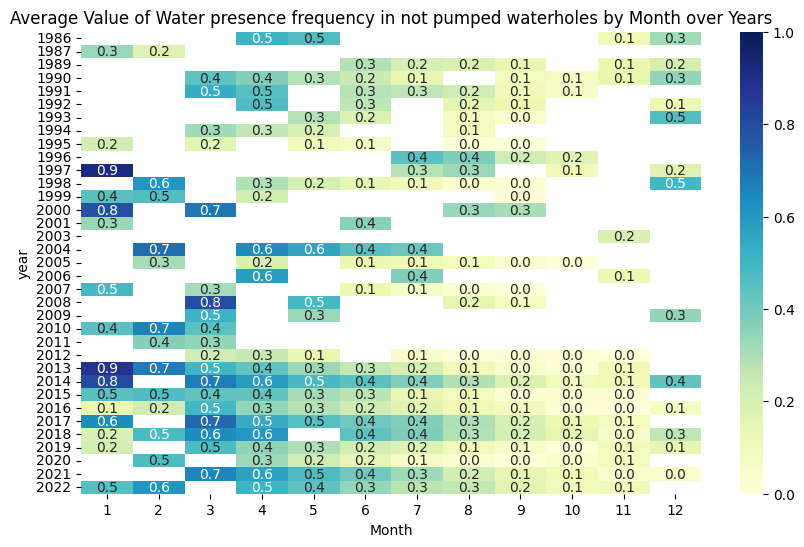

In [247]:
dfNotPumped['Date']= pd.to_datetime(dfNotPumped.index)
dfNotPumped['Year'] = dfNotPumped['Date'].dt.year
dfNotPumped['Month'] = dfNotPumped['Date'].dt.month
heatmap_data = dfNotPumped.groupby(['Year', 'Month'])['MeanFreq_NP'].mean().unstack()
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", cbar=True, vmin=0, vmax=1, yticklabels=True)
plt.title('Average Value of Water presence frequency in not pumped waterholes by Month over Years')
plt.xlabel('Month')
plt.ylabel('year')
plt.show()

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\287783745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['Date'] = pd.to_datetime(dfNotPumped.index)
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\287783745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotPumped['Year'] = dfNotPumped['Date'].dt.year
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\287783745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

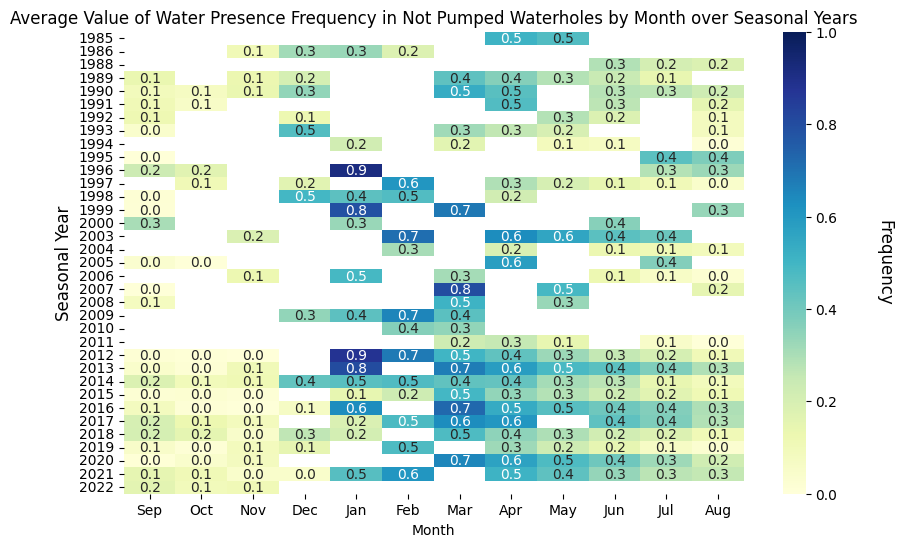

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the index to datetime if not already done
dfNotPumped['Date'] = pd.to_datetime(dfNotPumped.index)

# Extract the year and month
dfNotPumped['Year'] = dfNotPumped['Date'].dt.year
dfNotPumped['Month'] = dfNotPumped['Date'].dt.month

# Create a column for the seasonal year
dfNotPumped['SeasonalYear'] = dfNotPumped.apply(lambda row: row['Year'] if row['Month'] >= 9 else row['Year'] - 1, axis=1)

# Reorganize the months to start in September and end in August
dfNotPumped['SeasonalMonth'] = dfNotPumped['Month'].apply(lambda x: x - 8 if x >= 9 else x + 4)

# Group by seasonal year and month, then calculate the mean
heatmap_data = dfNotPumped.groupby(['SeasonalYear', 'SeasonalMonth'])['MeanFreq_NP'].mean().unstack()

# Reorganize the columns to be in the order from September to August
heatmap_data = heatmap_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", cbar=True, vmin=0, vmax=1, yticklabels=True)
plt.title('Average Value of Water Presence Frequency in Not Pumped Waterholes by Month over Seasonal Years')
plt.xlabel('Month')
plt.ylabel('Seasonal Year', fontsize=12)  # Adjust the font size of the y-axis label

# Adjust the positions of the ticks to be centered
plt.xticks(ticks=np.arange(12) + 0.5, labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Add legend text next to the heatmap legend
cbar = ax.collections[0].colorbar
cbar.ax.text(4, 0.5, 'Frequency', rotation=-90, va='center', fontsize=12)  # Adjust the x position to 4

# Show the plot
plt.show()

In [249]:
print(dfNotPumped['MeanFreq_NP'])

Date
1986-04-07    0.508772
1986-05-25    0.465839
1986-11-17    0.106250
1986-12-03    0.314607
1987-01-04    0.329897
                ...   
2022-09-01    0.176471
2022-09-17    0.142857
2022-10-03    0.112500
2022-10-19    0.078431
2022-11-04    0.106918
Name: MeanFreq_NP, Length: 304, dtype: float64


#### Statistics of water presence frequency

In [250]:
dfNotPumped.describe()

,PTS1,PTS2,PTS3,PTS4,PTS5,PTS6,PTS7,PTS8,PTS9,PTS10,...,Count_im_Point_NP,Count_waterpres_Count_NP,StdWaterpresence_Point_NP,Q5_Point_Count_NP,Q75_Point_Count_NP,Date,Year,Month,SeasonalYear,SeasonalMonth
count,304.000000,268.000000,0.0,281.000000,275.000000,0.0,277.000000,277.000000,270.000000,271.000000,...,304.000000,304.000000,304.000000,304.0,304.000000,304,304.000000,304.000000,304.000000,304.000000
mean,0.440789,0.041045,NaN,0.274021,0.585455,NaN,0.238267,0.296029,0.103704,0.291513,...,143.046053,37.157895,0.382348,0.0,0.484375,2009-02-26 23:55:15.789473792,2008.651316,6.601974,2007.950658,7.009868
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.0,0.000000,1986-04-07 00:00:00,1986.000000,1.000000,1985.000000,1.000000
25%,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,140.000000,15.750000,0.312171,0.0,0.000000,1998-07-21 00:00:00,1998.000000,4.000000,1997.000000,4.000000
50%,0.000000,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,154.000000,33.000000,0.419953,0.0,0.000000,2013-07-30 00:00:00,2013.000000,7.000000,2012.000000,8.000000
75%,1.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,...,158.250000,53.250000,0.481458,0.0,1.000000,2018-06-06 00:00:00,2018.000000,9.000000,2017.000000,10.000000
max,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,171.000000,132.000000,0.506370,0.0,1.000000,2022-11-04 00:00:00,2022.000000,12.000000,2022.000000,12.000000
std,0.497300,0.198765,NaN,0.446816,0.493542,NaN,0.426794,0.457330,0.305442,0.455300,...,28.021524,26.588815,0.119527,0.0,0.499135,NaN,10.957620,3.011989,10.971048,3.732371


### Calculation of the monthly average over all years (12 averages, on per month in order to calculate anomalies)
### Note this monthly average is used in the calculation of anomalies for pumped and not pumped points

In [251]:
# Calculate the sum of images by month for all years (Water and no water - needed to calculate the mean of water presence by month)
monthly_sum_im_Count_NP = dfNotPumped.groupby(['Month'])['Count_im_Point_NP'].sum()
monthly_sum_im_Count_NP=monthly_sum_im_Count_NP.rename('monthly_sum_im_Count_NP') 

In [252]:

# Merge the monthly sum back into the original DataFrame based on the 'Month' column
dfNotPumped = pd.merge(dfNotPumped, monthly_sum_im_Count_NP, on='Month', how='left')


dfNotPumped.info()
print(dfNotPumped.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 220 entries, PTS1 to monthly_sum_im_Count_NP
dtypes: datetime64[ns](1), float64(212), int32(2), int64(5)
memory usage: 520.3 KB
['PTS1', 'PTS2', 'PTS3', 'PTS4', 'PTS5', 'PTS6', 'PTS7', 'PTS8', 'PTS9', 'PTS10', 'PTS11', 'PTS12', 'PTS13', 'PTS14', 'PTS15', 'PTS16', 'PTS17', 'PTS18', 'PTS19', 'PTS20', 'PTS21', 'PTS22', 'PTS23', 'PTS24', 'PTS25', 'PTS26', 'PTS27', 'PTS28', 'PTS29', 'PTS30', 'PTS31', 'PTS32', 'PTS33', 'PTS34', 'PTS35', 'PTS36', 'PTS37', 'PTS38', 'PTS39', 'PTS40', 'PTS41', 'PTS42', 'PTS43', 'PTS44', 'PTS45', 'PTS46', 'PTS47', 'PTS48', 'PTS49', 'PTS50', 'PTS51', 'PTS52', 'PTS53', 'PTS54', 'PTS55', 'PTS56', 'PTS57', 'PTS58', 'PTS59', 'PTS60', 'PTS61', 'PTS62', 'PTS63', 'PTS64', 'PTS65', 'PTS66', 'PTS67', 'PTS68', 'PTS69', 'PTS70', 'PTS71', 'PTS72', 'PTS73', 'PTS74', 'PTS75', 'PTS76', 'PTS77', 'PTS78', 'PTS79', 'PTS80', 'PTS81', 'PTS82', 'PTS83', 'PTS84', 'PTS85', 'PTS86', 'PTS87', 'PTS88', 'PTS89'

In [253]:
# Calulate the sum of water presence by month for all years
# Calculate the sum of images by month for all years (Water and no water - needed to calculate the mean of water presence by month)
monthly_sum_WaterPres_Count_NP = dfNotPumped.groupby(['Month'])['Count_waterpres_Count_NP'].sum()
#monthly_sum_WaterPres_Count.rename(columns={'Count_waterpres_Count': 'Monthly_Sum_WaterPres_count'}, inplace=True)
monthly_sum_WaterPres_Count_NP =monthly_sum_WaterPres_Count_NP.rename('monthly_sum_WaterPres_Count_NP') 
# Merge the monthly sum back into the original DataFrame based on the 'Month' column
dfNotPumped = pd.merge(dfNotPumped, monthly_sum_WaterPres_Count_NP, on='Month', how='left')

In [254]:
dfNotPumped_last_two_columns = dfNotPumped.iloc[:, -3:]  # Two last columns of dataframe to check the merge
print(dfNotPumped_last_two_columns)

#The two last columns are : the total number of images used by month and the total number of images with water presence by month

     SeasonalMonth  monthly_sum_im_Count_NP  monthly_sum_WaterPres_Count_NP
0                8                     3638                            1567
1                9                     4484                            1552
2                3                     2213                             186
3                4                     1688                             383
4                5                     1746                             762
..             ...                      ...                             ...
299              1                     5679                             566
300              1                     5679                             566
301              2                     3147                             222
302              2                     3147                             222
303              3                     2213                             186

[304 rows x 3 columns]


In [255]:
#Calculate the mean of water presence by month for all years

Monthly_mean_WaterPres_all_years_NP=dfNotPumped['monthly_sum_WaterPres_Count_NP']/dfNotPumped['monthly_sum_im_Count_NP']
Monthly_mean_WaterPres_all_years_NP.head()
dfNotPumped['Monthly_mean_WaterPres_all_years_NP']=Monthly_mean_WaterPres_all_years_NP
dfNotPumped.iloc[:,-1:].head(20)
print(dfNotPumped)

     PTS1  PTS2  PTS3  PTS4  PTS5  PTS6  PTS7  PTS8  PTS9  PTS10  ...  \
0     1.0   NaN   NaN   NaN   1.0   NaN   1.0   1.0   1.0    NaN  ...   
1     1.0   0.0   NaN   0.0   0.0   NaN   1.0   1.0   0.0    0.0  ...   
2     0.0   0.0   NaN   0.0   0.0   NaN   0.0   0.0   0.0    0.0  ...   
3     1.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN    NaN  ...   
4     1.0   NaN   NaN   NaN   0.0   NaN   1.0   1.0   NaN    NaN  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
299   0.0   0.0   NaN   0.0   1.0   NaN   0.0   0.0   0.0    0.0  ...   
300   0.0   0.0   NaN   0.0   1.0   NaN   0.0   0.0   0.0    0.0  ...   
301   0.0   0.0   NaN   0.0   1.0   NaN   0.0   0.0   0.0    0.0  ...   
302   0.0   0.0   NaN   0.0   1.0   NaN   0.0   0.0   0.0    0.0  ...   
303   0.0   0.0   NaN   0.0   0.0   NaN   0.0   0.0   0.0    0.0  ...   

     Q5_Point_Count_NP  Q75_Point_Count_NP       Date  Year  Month  \
0                  0.0                 1.0 1986-04-07

In [256]:
Water_Presence_Anomaly_by_month_NP=((dfNotPumped['MeanFreq_NP']-dfNotPumped['Monthly_mean_WaterPres_all_years_NP'])/dfNotPumped['Monthly_mean_WaterPres_all_years_NP'])*100
dfNotPumped['Water_Presence_Anomaly_by_month_NP']=Water_Presence_Anomaly_by_month_NP

In [257]:
dfNotPumped.iloc[:,-12:].head(5) 

,StdWaterpresence_Point_NP,Q5_Point_Count_NP,Q75_Point_Count_NP,Date,Year,Month,SeasonalYear,SeasonalMonth,monthly_sum_im_Count_NP,monthly_sum_WaterPres_Count_NP,Monthly_mean_WaterPres_all_years_NP,Water_Presence_Anomaly_by_month_NP
0,0.502130,0.0,1.0,1986-04-07,1986,4,1985,8,3638,1567,0.430731,18.118206
1,0.500388,0.0,1.0,1986-05-25,1986,5,1985,9,4484,1552,0.346120,34.588910
2,0.309125,0.0,0.0,1986-11-17,1986,11,1986,3,2213,186,0.084049,26.414651
3,0.466990,0.0,1.0,1986-12-03,1986,12,1986,4,1688,383,0.226896,38.656966
4,0.472618,0.0,1.0,1987-01-04,1987,1,1986,5,1746,762,0.436426,-24.409449


### Monthly mean of water presence by year for not pumped waterholes showing climate variability

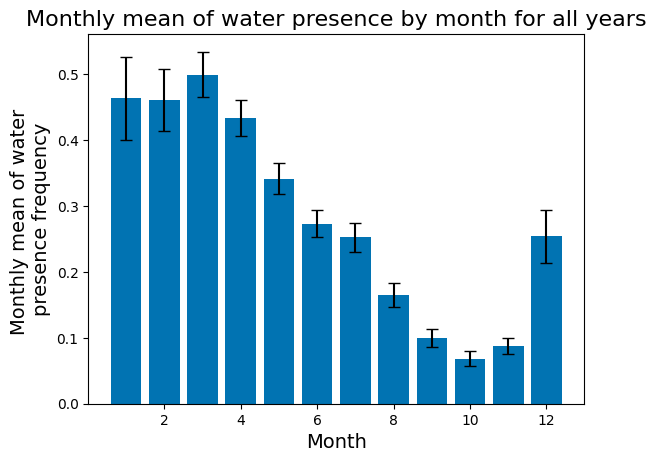

In [258]:
# Group data by month
grouped_NP = dfNotPumped.groupby(dfNotPumped['Month'])

# Calculate mean water presence
mean_water_presence_NP = grouped_NP['MeanFreq_NP'].mean()

# Calculate standard error of water presence
std_error_water_presence_NP = grouped_NP['MeanFreq_NP'].sem()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot with error bars
ax.bar(mean_water_presence_NP.index, mean_water_presence_NP, yerr=std_error_water_presence_NP, capsize=4)

# Set the title and labels with larger font size
plt.title('Monthly mean of water presence by month for all years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly mean of water \npresence frequency', fontsize=14)    
plt.show()

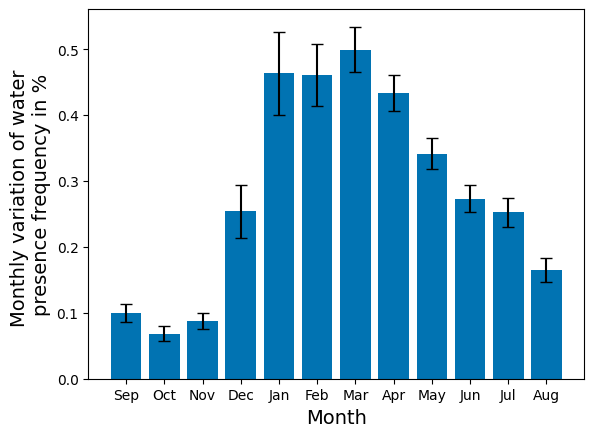

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

# Assume that monthly_variation_NP is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
mean_water_presence_NP_graphe = mean_water_presence_NP.reindex(months_order)
std_error_water_presence_NP_graphe = std_error_water_presence_NP.reindex(months_order)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart with error bars
bars = ax.bar(range(len(mean_water_presence_NP_graphe)), mean_water_presence_NP_graphe, yerr=std_error_water_presence_NP_graphe, capsize=4)

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Set the title and labels with a larger font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly variation of water \npresence frequency in %', fontsize=14)    
plt.show()

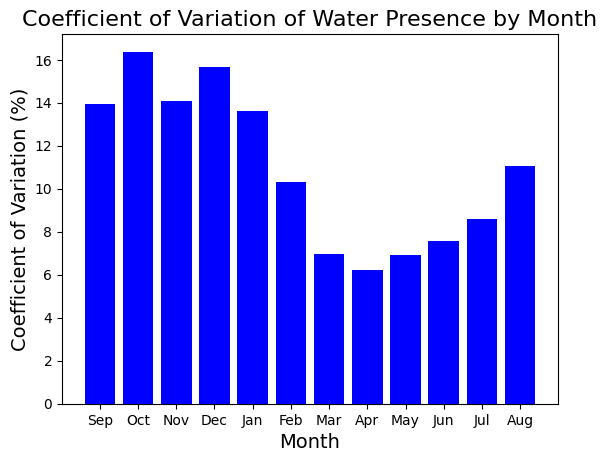

In [260]:
# Calculate the coefficient of variation for each month
cv_water_presence_NP = (std_error_water_presence_NP_graphe / mean_water_presence_NP_graphe) * 100

# Create a figure and a set of subplots for the coefficient of variation
fig, ax = plt.subplots()

# Create a bar chart for the coefficient of variation
bars = ax.bar(range(len(cv_water_presence_NP)), cv_water_presence_NP, color='blue', capsize=4)

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Set the title and labels with a larger font size
plt.title('Coefficient of Variation of Water Presence by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Coefficient of Variation (%)', fontsize=14)

# Show the plot
plt.show()

In [261]:

# Calculate the difference from the previous month
diff_water_presence_NP = mean_water_presence_NP - mean_water_presence_NP.shift(1)

# Handle the NaN value for the first month (assuming the index for January is 1)
diff_water_presence_NP.loc[1] = mean_water_presence_NP.loc[1] - mean_water_presence_NP.loc[12]

# Calculate the variation from the previous month
monthly_variation_NP = (diff_water_presence_NP / mean_water_presence_NP.shift(1))*100

# Handle the NaN value for the first month (assuming the index for January is 1)
monthly_variation_NP.loc[1] = ((diff_water_presence_NP.loc[1] / mean_water_presence_NP.loc[12]))*100

# Display the monthly variation
print(monthly_variation_NP)

Month
1      82.475578
2      -0.488217
3       8.331472
4     -13.194126
5     -21.186341
6     -19.985123
7      -7.640313
8     -34.854959
9     -39.650647
10    -31.002230
11     28.188250
12    189.151227
Name: MeanFreq_NP, dtype: float64


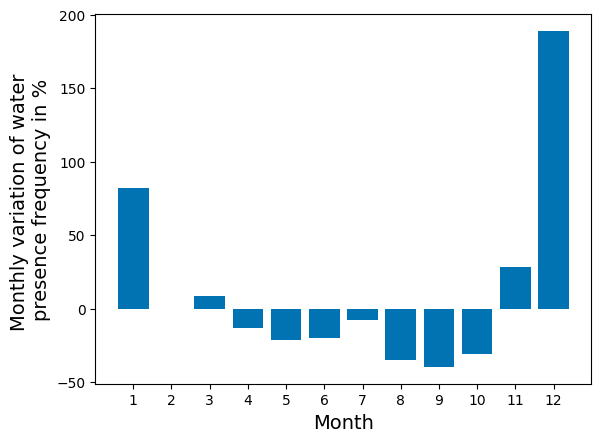

In [262]:
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot with error bars
bars = ax.bar(monthly_variation_NP.index, monthly_variation_NP, capsize=4)

# Set the x-ticks to be every month
ax.set_xticks(monthly_variation_NP.index)

# Set the title and labels with larger font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly variation of water \npresence frequency in %', fontsize=14)    
plt.show()

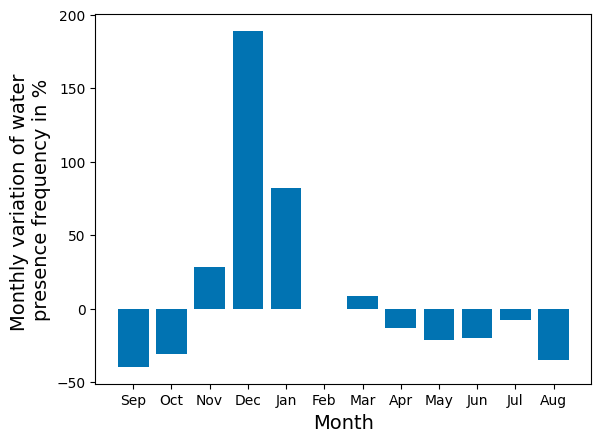

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

# Assume that monthly_variation_NP is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
monthly_variation_NP = monthly_variation_NP.reindex(months_order)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart with error bars
bars = ax.bar(range(len(monthly_variation_NP)), monthly_variation_NP, capsize=4)

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Set the title and labels with a larger font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly variation of water \npresence frequency in %', fontsize=14)    
plt.show()

### Heatmap of Water presence frequency anomaly in wet and dry season in not pumped points

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2785499943.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('RdBu_r')


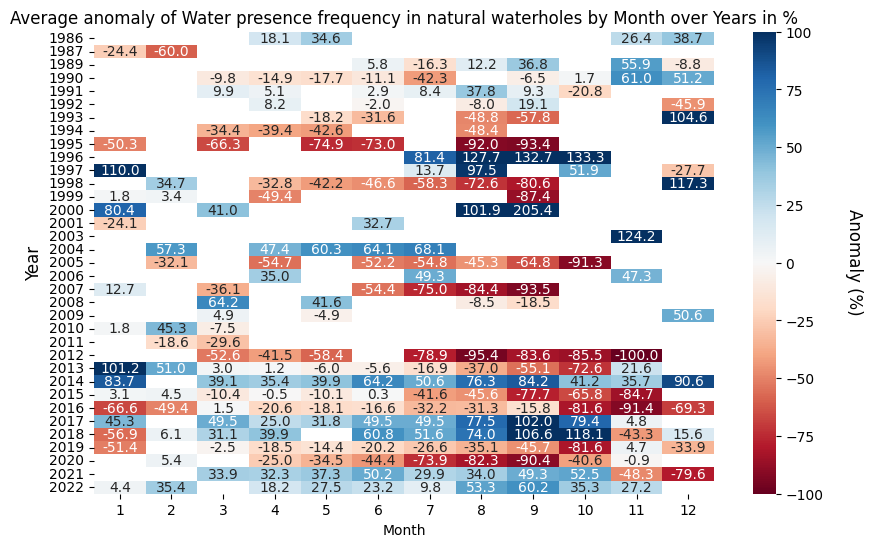

In [264]:
# heatmap of monthly anomaly of water presence
# Réinitialiser l'index
dfNotPumped = dfNotPumped.reset_index(drop=True)

heatmap_data = dfNotPumped.groupby(['Year', 'Month'])['Water_Presence_Anomaly_by_month_NP'].mean().unstack()
# Create the heatmap
plt.figure(figsize=(10, 6))
orig_map = plt.cm.get_cmap('RdBu_r')
reversed_map = orig_map.reversed()
ax1 = sns.heatmap(heatmap_data, annot=True, cmap=reversed_map, fmt=".1f", cbar=True, center=0, vmin=-100, vmax=100, yticklabels=True)

# Ajouter le titre et les labels des axes
plt.title('Average anomaly of Water presence frequency in natural waterholes by Month over Years in %')
plt.xlabel('Month')
plt.ylabel('Year', fontsize=12)  # Ajuster la taille de la police du label de l'axe y

# Ajouter du texte de légende à côté de la légende de la heatmap
cbar = ax1.collections[0].colorbar
cbar.ax.text(4, 0.5, 'Anomaly (%)', rotation=-90, va='center', fontsize=12)  # Ajuster la position x à 4

# Afficher le graphique
plt.show()

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\3980688676.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('RdBu_r')


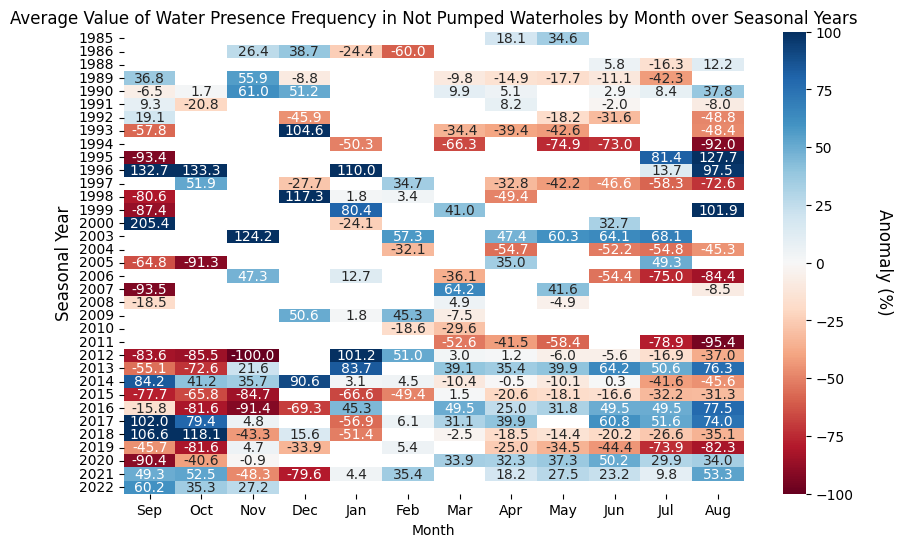

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract the year and month
dfNotPumped['Year'] = dfNotPumped['Date'].dt.year
dfNotPumped['Month'] = dfNotPumped['Date'].dt.month

# Create a column for the seasonal year
dfNotPumped['SeasonalYear'] = dfNotPumped.apply(lambda row: row['Year'] if row['Month'] >= 9 else row['Year'] - 1, axis=1)

# Reorganize the months to start in September and end in August
dfNotPumped['SeasonalMonth'] = dfNotPumped['Month'].apply(lambda x: x - 8 if x >= 9 else x + 4)

# Group by seasonal year and month, then calculate the mean
heatmap_data = dfNotPumped.groupby(['SeasonalYear', 'SeasonalMonth'])['Water_Presence_Anomaly_by_month_NP'].mean().unstack()

# Reorganize the columns to be in the order from September to August
heatmap_data = heatmap_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

# Create the heatmap
plt.figure(figsize=(10, 6))
orig_map = plt.cm.get_cmap('RdBu_r')
reversed_map = orig_map.reversed()
ax = sns.heatmap(heatmap_data, annot=True, cmap=reversed_map, fmt=".1f", cbar=True, center=0, vmin=-100, vmax=100, yticklabels=True)
plt.title('Average Value of Water Presence Frequency in Not Pumped Waterholes by Month over Seasonal Years')
plt.xlabel('Month')
plt.ylabel('Seasonal Year', fontsize=12)  # Adjust the font size of the y-axis label

# Adjust the positions of the ticks to be centered
plt.xticks(ticks=np.arange(12) + 0.5, labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Add legend text next to the heatmap legend
cbar = ax.collections[0].colorbar
cbar.ax.text(4, 0.5, 'Anomaly (%)', rotation=-90, va='center', fontsize=12)  # Adjust the x position to 4

# Show the plot
plt.show()

### Times series of Water presence frequency and anomalies in wet and dry season in not pumped points

DatetimeIndex(['1986-04-07', '1986-05-25', '1986-11-17', '1986-12-03',
               '1987-01-04', '1987-02-21', '1989-06-18', '1989-07-20',
               '1989-08-21', '1989-09-22',
               ...
               '2022-06-13', '2022-06-29', '2022-07-15', '2022-07-31',
               '2022-08-16', '2022-09-01', '2022-09-17', '2022-10-03',
               '2022-10-19', '2022-11-04'],
              dtype='datetime64[ns]', name='Date', length=304, freq=None)
DatetimeIndex(['1986-04-07', '1986-05-25', '1986-11-17', '1986-12-03',
               '1987-01-04', '1987-02-21', '1989-06-18', '1989-07-20',
               '1989-08-21', '1989-09-22',
               ...
               '2022-06-13', '2022-06-29', '2022-07-15', '2022-07-31',
               '2022-08-16', '2022-09-01', '2022-09-17', '2022-10-03',
               '2022-10-19', '2022-11-04'],
              dtype='datetime64[ns]', name='Date', length=304, freq=None)
Date
1986-04-07    0.508772
1986-05-25    0.465839
1986-11-17    0.10625

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2976203797.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([dates[i - 1], dates[i]], [values[i - 1], values[i]], color=color, label='Time Series Data',marker='o', linestyle='-',linewidth=0.75)


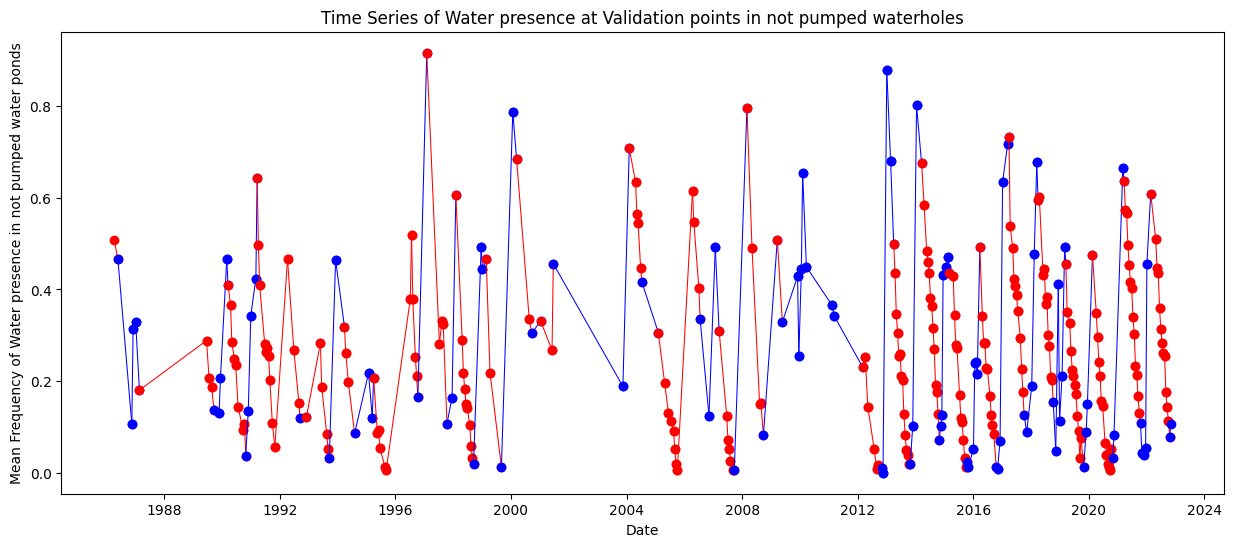

In [266]:
df_withDateAsIndexnotpumed = dfNotPumped.set_index('Date')
# Generate example time series data with corresponding dates
dates =  df_withDateAsIndexnotpumed.index
print(dates)
values = df_withDateAsIndexnotpumed['MeanFreq_NP']
print(dates)
print(values)
# Define the condition for color change
def is_nov_to_mar(dates):
    return dates.month in [11, 12, 1, 2, 3]

# Create a figure and axis
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(6)
# Plot the time series data with different line colors based on the condition
for i in range(1, len(dates)):
    color = 'blue' if is_nov_to_mar(dates[i]) else 'red'
    ax.plot([dates[i - 1], dates[i]], [values[i - 1], values[i]], color=color, label='Time Series Data',marker='o', linestyle='-',linewidth=0.75)

# Add labels and legend
plt.title('Time Series of Water presence at Validation points in not pumped waterholes')
plt.xlabel('Date')
plt.ylabel('Mean Frequency of Water presence in not pumped water ponds')
# plt.legend()
# Show the plot
plt.show()

304


(array([ 5113.,  5479.,  5844.,  6209.,  6574.,  6940.,  7305.,  7670.,
         8035.,  8401.,  8766.,  9131.,  9496.,  9862., 10227., 10592.,
        10957., 11323., 11688., 12053., 12418., 12784., 13149., 13514.,
        13879., 14245., 14610., 14975., 15340., 15706., 16071., 16436.,
        16801., 17167., 17532., 17897., 18262., 18628., 18993., 19358.,
        19723.]),
 [Text(5113.0, 0, '1984'),
  Text(5479.0, 0, '1985'),
  Text(5844.0, 0, '1986'),
  Text(6209.0, 0, '1987'),
  Text(6574.0, 0, '1988'),
  Text(6940.0, 0, '1989'),
  Text(7305.0, 0, '1990'),
  Text(7670.0, 0, '1991'),
  Text(8035.0, 0, '1992'),
  Text(8401.0, 0, '1993'),
  Text(8766.0, 0, '1994'),
  Text(9131.0, 0, '1995'),
  Text(9496.0, 0, '1996'),
  Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '

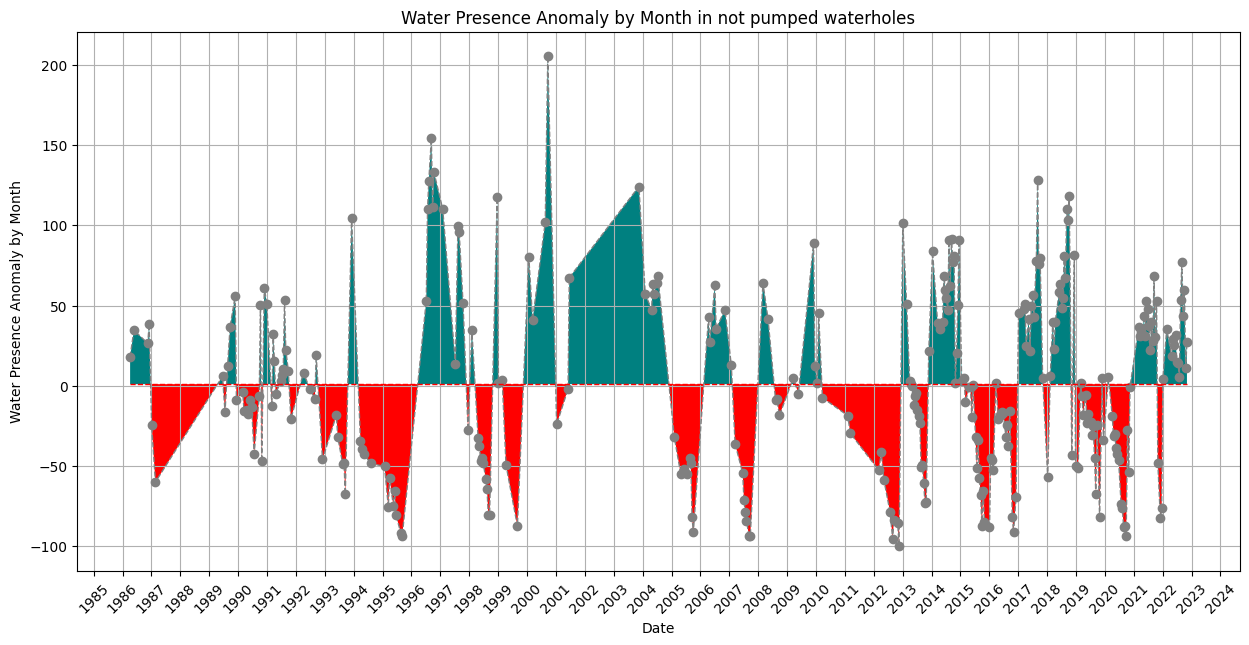

In [267]:

fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title('Water Presence Anomaly by Month in not pumped waterholes')
ax.set_xlabel('Date')   
ax.set_ylabel('Water Presence Anomaly by Month')

ax.plot(dfNotPumped['Date'],dfNotPumped['Water_Presence_Anomaly_by_month_NP'],marker='o', color='gray', linewidth=1, linestyle='--'    )

y1=dfNotPumped['Water_Presence_Anomaly_by_month_NP']

x=len(dfNotPumped['Water_Presence_Anomaly_by_month_NP'])
print(x)
x_array = dfNotPumped['Date']

x=(np.ones(len(x_array)))
y2 = x
# # print(y2)
ax.plot(x_array, y2, color='red', linewidth=1, linestyle='--')
ax.fill_between(x_array, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
ax.fill_between(x_array, y1, y2, where=y2 <= y1, facecolor='teal', interpolate=True)
ax.grid(True)
years = mdates.YearLocator()  # Define a locator for years
year_format = mdates.DateFormatter('%Y')  # Define the date format

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)
plt.xticks(rotation=45)

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\581240453.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(WaterFreqNP, kde=True,color='goldenrod',bins=50,kde_kws={"color": "red", "lw": 2, 'clip': (0.0, 1.0)})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Density')

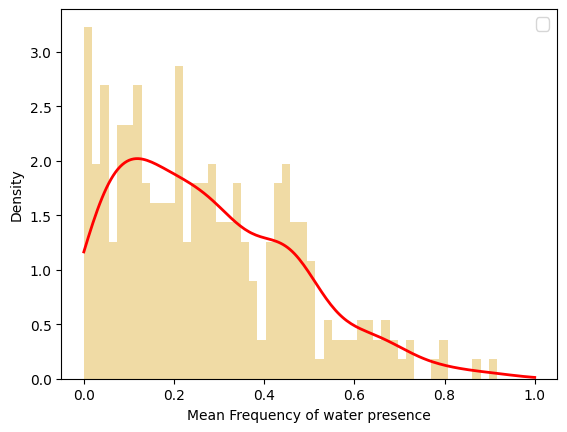

In [268]:

WaterFreqNP=df_withDateAsIndexnotpumed['MeanFreq_NP']

g=sns.distplot(WaterFreqNP, kde=True,color='goldenrod',bins=50,kde_kws={"color": "red", "lw": 2, 'clip': (0.0, 1.0)})

plt.legend(prop={'size': 12})
plt.xlabel('Mean Frequency of water presence')
plt.ylabel('Density')


In [269]:
print(df_withDateAsIndexnotpumed['MeanFreq_NP'])

Date
1986-04-07    0.508772
1986-05-25    0.465839
1986-11-17    0.106250
1986-12-03    0.314607
1987-01-04    0.329897
                ...   
2022-09-01    0.176471
2022-09-17    0.142857
2022-10-03    0.112500
2022-10-19    0.078431
2022-11-04    0.106918
Name: MeanFreq_NP, Length: 304, dtype: float64


C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\4132163565.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WaterFreq_anomaly_NP, kde=True, bins=50,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Density')

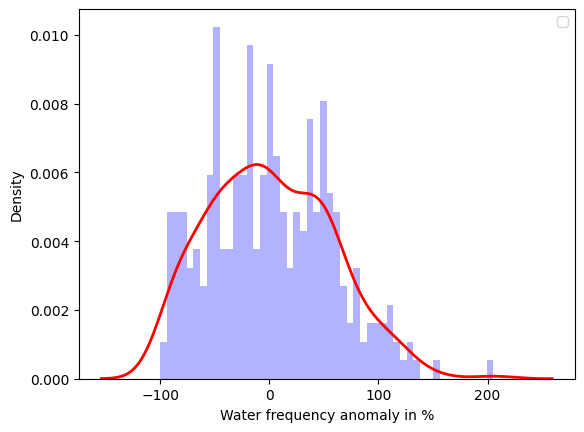

In [270]:
WaterFreq_anomaly_NP=df_withDateAsIndexnotpumed['Water_Presence_Anomaly_by_month_NP']

sns.distplot(WaterFreq_anomaly_NP, kde=True, bins=50,
             hist_kws={"color": "blue", "alpha": 0.3}, 
             kde_kws={"color": "red", "lw": 2})

plt.legend(prop={'size': 10})
plt.xlabel('Water frequency anomaly in %')
plt.ylabel('Density')

In [271]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
stat, p = shapiro(WaterFreq_anomaly_NP)

# Print the test statistic and the p-value
print('Test statistic:', stat)
print('p-value:', p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Test statistic: 0.9804031848907471
p-value: 0.00035670140641741455
Sample does not look Gaussian (reject H0)


In [272]:
from scipy.stats import mannwhitneyu, ks_2samp
WaterFreq_anomaly_NP=df_withDateAsIndexnotpumed['Water_Presence_Anomaly_by_month_NP']

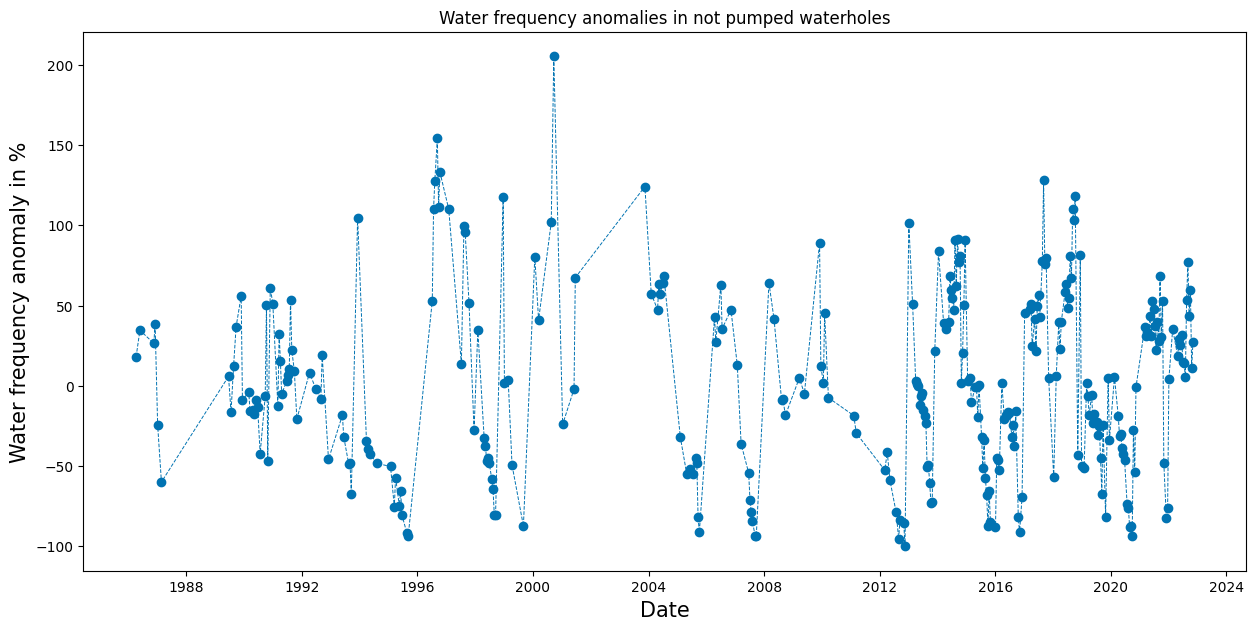

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the "colorblind" palette from Seaborn
sns.set_palette("colorblind")

# Choose a color suitable for colorblind individuals
color_blind_palette = sns.color_palette("colorblind")
visible_color = color_blind_palette[0]  # Blue suitable for colorblind individuals

# Create the plot for water presence anomalies in not pumped waterholes
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.plot(df_withDateAsIndexnotpumed['Water_Presence_Anomaly_by_month_NP'], marker='o', color=visible_color, linewidth=0.7, linestyle='--')
plt.title('Water frequency anomalies in not pumped waterholes')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Water frequency anomaly in %', fontsize=15)

# Show the plot
plt.show()

###  Climatic calculation

In [274]:
df_rain = pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/ERA_Precip_Monthly.csv',sep=';', header=0)
print(df_rain.head(5))
df_EVI_NDVI = pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/NDVI_EVI_MODIS.csv',sep=';', header=0)
print(df_EVI_NDVI.head(5))
df_EVI_NDVI.info()

df_temp = (pd.read_csv('D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Data/ERA_Temp_Monthly.csv',sep=';', header=0))
print(df_temp.head(5))
df_temp.info()

ts3 = df_rain['Rain (m)']
ts4 = df_EVI_NDVI['NDVI']
ts5 = df_temp['Temperature (K)']

         Date  Rain (m)
0  01/01/1985     0.204
1  02/01/1985     0.130
2  03/01/1985     0.052
3  04/01/1985     0.013
4  05/01/1985     0.005
          Date       EVI      NDVI
0  18/Feb/2000  0.403067  0.594312
1   5/Mar/2000  0.433737  0.656898
2  21/Mar/2000  0.378783  0.648519
3   6/Apr/2000  0.366548  0.622661
4  22/Apr/2000  0.306317  0.574145
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    503 non-null    object 
 1   EVI     503 non-null    float64
 2   NDVI    503 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB
     Date  Temperature (K)
0  1/1/85          296.505
1  2/1/85          295.992
2  3/1/85          296.887
3  4/1/85          294.930
4  5/1/85          291.951
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column           Non-Null Count  

In [275]:
df_rain.head()
df_EVI_NDVI.head()
df_EVI_NDVI.head()
df_withDateAsIndexnotpumed.head()
print(df_rain.columns)
print(df_temp.columns)

# Merge df_rain and df_withDateAsIndexpumped
df_rain['Date']= pd.to_datetime(df_rain['Date'])
df_rain['Year'] = df_rain['Date'].dt.year
df_rain['Month'] = df_rain['Date'].dt.month 
df_merged=pd.merge(df_withDateAsIndexnotpumed, df_rain, on=['Year','Month'], how='left')

# Merge df_temp and df_merged
df_temp['Date']= pd.to_datetime(df_temp['Date'])
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month 
df_merged=pd.merge(df_merged, df_temp, on=['Year','Month'], how='left')

# Calculate monthly mean
df_monthly_mean = df_merged.groupby(['Year', 'Month']).mean()

# Print the last five columns info
info_last_five_columns = df_monthly_mean.iloc[:, -15:].info()


Index(['Date', 'Rain (m)'], dtype='object')
Index(['Date', 'Temperature (K)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 223 entries, (1986, 4) to (2022, 11)
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Count_im_Point_NP                    223 non-null    float64       
 1   Count_waterpres_Count_NP             223 non-null    float64       
 2   StdWaterpresence_Point_NP            223 non-null    float64       
 3   Q5_Point_Count_NP                    223 non-null    float64       
 4   Q75_Point_Count_NP                   223 non-null    float64       
 5   SeasonalYear                         223 non-null    float64       
 6   SeasonalMonth                        223 non-null    float64       
 7   monthly_sum_im_Count_NP              223 non-null    float64       
 8   monthly_sum_WaterPres_Count_NP       223 non-null 

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2426367614.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp['Date']= pd.to_datetime(df_temp['Date'])


In [276]:

print(df_monthly_mean.columns)

Index(['PTS1', 'PTS2', 'PTS3', 'PTS4', 'PTS5', 'PTS6', 'PTS7', 'PTS8', 'PTS9',
       'PTS10',
       ...
       'SeasonalYear', 'SeasonalMonth', 'monthly_sum_im_Count_NP',
       'monthly_sum_WaterPres_Count_NP', 'Monthly_mean_WaterPres_all_years_NP',
       'Water_Presence_Anomaly_by_month_NP', 'Date_x', 'Rain (m)', 'Date_y',
       'Temperature (K)'],
      dtype='object', length=224)


Text(0.5, 1.0, 'ERA 5- Average monthly rainfall in Hwange Park')

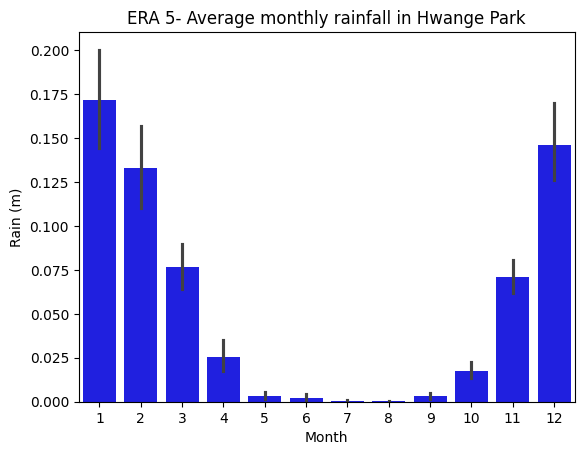

In [277]:
sns.barplot(x=df_rain["Month"], y=df_rain["Rain (m)"],color="b")
plt.title('ERA 5- Average monthly rainfall in Hwange Park')    

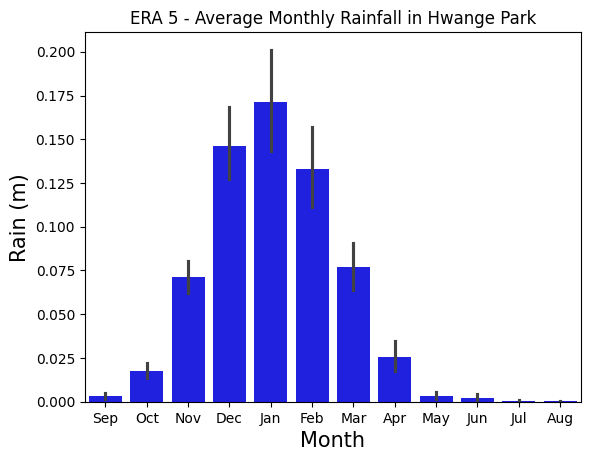

In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume that df_rain is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
df_rain['Month'] = pd.Categorical(df_rain['Month'], categories=months_order, ordered=True)
df_rain = df_rain.sort_values('Month')

# Create a bar plot with the reordered data
sns.barplot(x=df_rain["Month"], y=df_rain["Rain (m)"], color="b")

# Set the x-tick labels for each month
plt.xticks(ticks=range(len(months_order)), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Set the axis labels with a font size of 15
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rain (m)', fontsize=15)

# Set the title
plt.title('ERA 5 - Average Monthly Rainfall in Hwange Park')

# Show the plot
plt.show()

In [279]:
import pandas as pd

# Assume that df_rain is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
df_rain['Month'] = pd.Categorical(df_rain['Month'], categories=months_order, ordered=True)
df_rain = df_rain.sort_values('Month')

# Calculate the average rainfall per month
monthly_mean_rain = df_rain.groupby('Month')['Rain (m)'].mean()

# Calculate the difference in rainfall compared to the previous month
diff_rain = monthly_mean_rain - monthly_mean_rain.shift(1)

# Handle the NaN value for the first month (September)
diff_rain.iloc[0] = monthly_mean_rain.iloc[0] - monthly_mean_rain.iloc[-1]

# Calculate the monthly variation in percentage
monthly_variation = (diff_rain / monthly_mean_rain.shift(1)) * 100

# Handle the NaN value for the first month (September)
monthly_variation.iloc[0] = (diff_rain.iloc[0] / monthly_mean_rain.iloc[-1]) * 100

# Display the monthly variation
print(monthly_variation)
print(diff_rain)

Month
9     1700.000000
10     474.074074
11     301.451613
12     105.343511
1       17.385704
2      -22.459893
3      -42.277952
4      -66.654598
5      -87.079262
6      -29.411765
7      -70.612245
8      -75.000000
Name: Rain (m), dtype: float64
Month
9     0.002914
10    0.014629
11    0.053400
12    0.074914
1     0.025388
2    -0.038500
3    -0.056194
4    -0.051139
5    -0.022278
6    -0.000972
7    -0.001648
8    -0.000514
Name: Rain (m), dtype: float64


C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\478076427.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean_rain = df_rain.groupby('Month')['Rain (m)'].mean()


Month
9     1700.000000
10     474.074074
11     301.451613
12     105.343511
1       17.385704
2      -22.459893
3      -42.277952
4      -66.654598
5      -87.079262
6      -29.411765
7      -70.612245
8      -75.000000
Name: Rain (m), dtype: float64


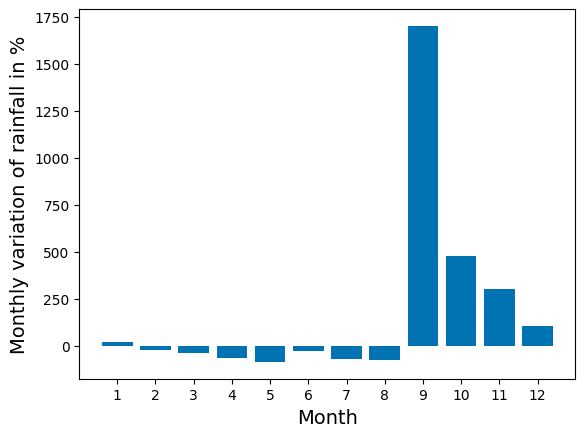

In [280]:
# Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Display the monthly variation
print(monthly_variation)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot with error bars
bars = ax.bar(monthly_variation.index, monthly_variation, capsize=4)

# Set the x-ticks to be every month
ax.set_xticks(monthly_variation.index)

# Set the title and labels with larger font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly variation of rainfall in %', fontsize=14)    
plt.show()

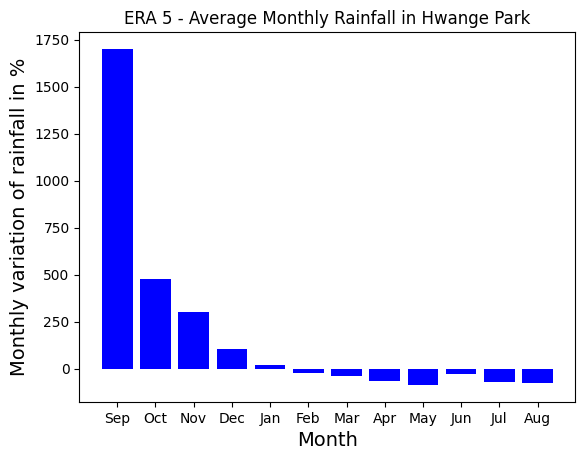

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

# Assume that monthly_variation is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
monthly_variation.index = pd.Categorical(monthly_variation.index, categories=months_order, ordered=True)
monthly_variation = monthly_variation.sort_index()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart with error bars and set the color of the bars to blue
bars = ax.bar(range(len(months_order)), monthly_variation.values, capsize=4, color='b')

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(months_order)

# Set the title and labels with a larger font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly variation of rainfall in %', fontsize=14)    
plt.title('ERA 5 - Average Monthly Rainfall in Hwange Park')

# Show the plot
plt.show()

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\1432675806.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rain['Coefficient_of_Variation_Rainfall'] = df_rain.groupby('Month')['Rain (m)'].transform(lambda x: x.std() / x.mean())


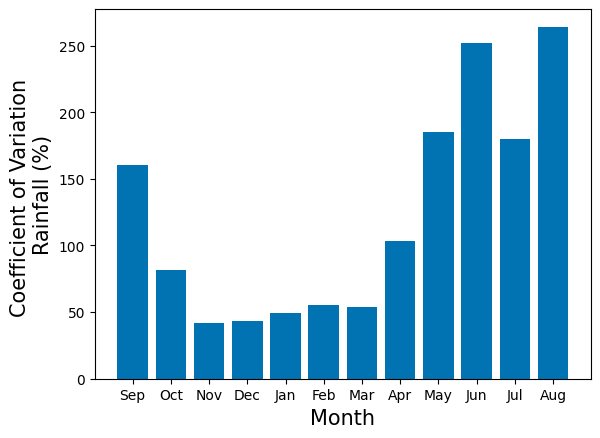

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the "colorblind" palette from Seaborn
sns.set_palette("colorblind")

# Assume that df_rain is already defined and contains the necessary data
# df_rain should have a 'Month' column and a column with rainfall values

# Calculate the coefficient of variation of rainfall for each month
df_rain['Coefficient_of_Variation_Rainfall'] = df_rain.groupby('Month')['Rain (m)'].transform(lambda x: x.std() / x.mean())

# Extract unique values for each month
cvc = df_rain[['Month', 'Coefficient_of_Variation_Rainfall']].drop_duplicates()

# Reorder the months to start in September and end in August
months_order = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
cvc['Month'] = pd.Categorical(cvc['Month'], categories=months_order, ordered=True)
cvc = cvc.sort_values('Month')

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Choose a blue color suitable for colorblind individuals
color_blind_palette = sns.color_palette("colorblind")
blue_color = color_blind_palette[0]  # Blue suitable for colorblind individuals

# Create a bar chart with error bars and set the color of the bars
bars = ax.bar(range(len(months_order)), cvc['Coefficient_of_Variation_Rainfall'].values * 100, color=blue_color, capsize=4)

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(months_order)

# Set the axis labels
plt.xlabel('Month', fontsize=15)
plt.ylabel('Coefficient of Variation \nRainfall (%)', fontsize=15)

# Show the plot
plt.show()

Text(0.5, 1.0, 'ERA 5- Average monthly temperature in Hwange Park')

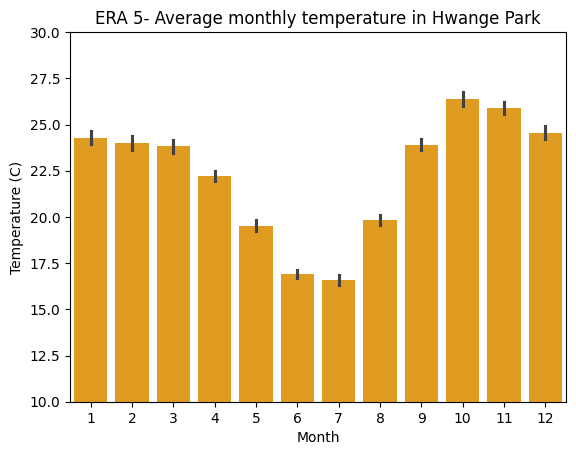

In [283]:
df_temp['Temperature (C)'] = df_temp['Temperature (K)'] - 273.15
sns.barplot(x=df_temp["Month"], y=df_temp["Temperature (C)"], color="orange")
plt.ylim(10, 30)
plt.title('ERA 5- Average monthly temperature in Hwange Park')

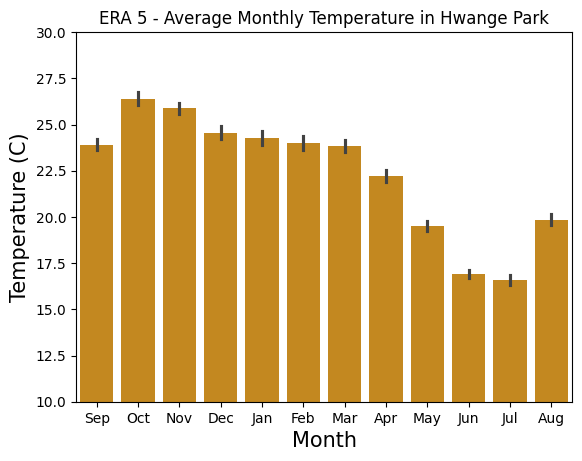

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the "colorblind" palette from Seaborn
sns.set_palette("colorblind")

# Assume that df_temp is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
df_temp['Month'] = pd.Categorical(df_temp['Month'], categories=months_order, ordered=True)
df_temp = df_temp.sort_values('Month')

# Choose an orange color suitable for colorblind individuals
color_blind_palette = sns.color_palette("colorblind")
orange_color = color_blind_palette[1]  # Orange suitable for colorblind individuals

# Create a bar plot with the reordered data
sns.barplot(x=df_temp["Month"], y=df_temp['Temperature (C)'], color=orange_color)

# Set the x-tick labels for each month
plt.xticks(ticks=range(len(months_order)), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.ylim(10, 30)

# Set the axis labels with a font size of 15
plt.xlabel('Month', fontsize=15)
plt.ylabel('Temperature (C)', fontsize=15)

# Set the title
plt.title('ERA 5 - Average Monthly Temperature in Hwange Park')

# Show the plot
plt.show()

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\793732783.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean = df_temp.groupby('Month')['Temperature (K)'].mean()
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\793732783.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_std = df_temp.groupby('Month')['Temperature (K)'].std()


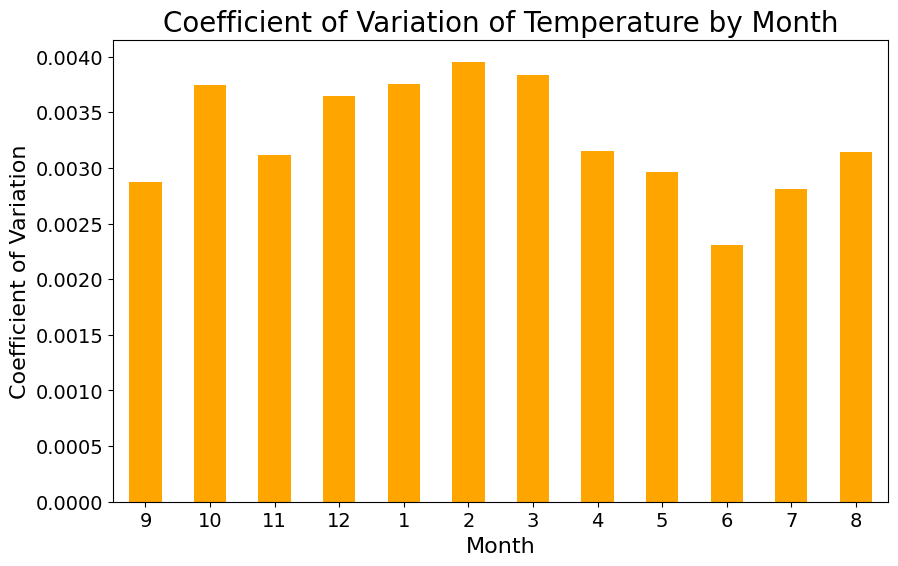

In [285]:
# Calculate mean and standard deviation for each month
monthly_mean = df_temp.groupby('Month')['Temperature (K)'].mean()
monthly_std = df_temp.groupby('Month')['Temperature (K)'].std()

# Calculate coefficient of variation
cv = monthly_std / monthly_mean

# Plot coefficient of variation
plt.figure(figsize=(10, 6))
cv.plot(kind='bar', color='orange')  # Change bar color to orange
plt.title('Coefficient of Variation of Temperature by Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Coefficient of Variation', fontsize=16)
plt.xticks(rotation='horizontal')  # Rotate x-axis labels
plt.tick_params(axis='both', which='major', labelsize=14)  # Increase tick size
plt.show()

C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2680170842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean_temp_C = df_temp.groupby('Month')['Temperature (C)'].mean()
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2680170842.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_std_temp_C = df_temp.groupby('Month')['Temperature (C)'].std()
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\2680170842.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

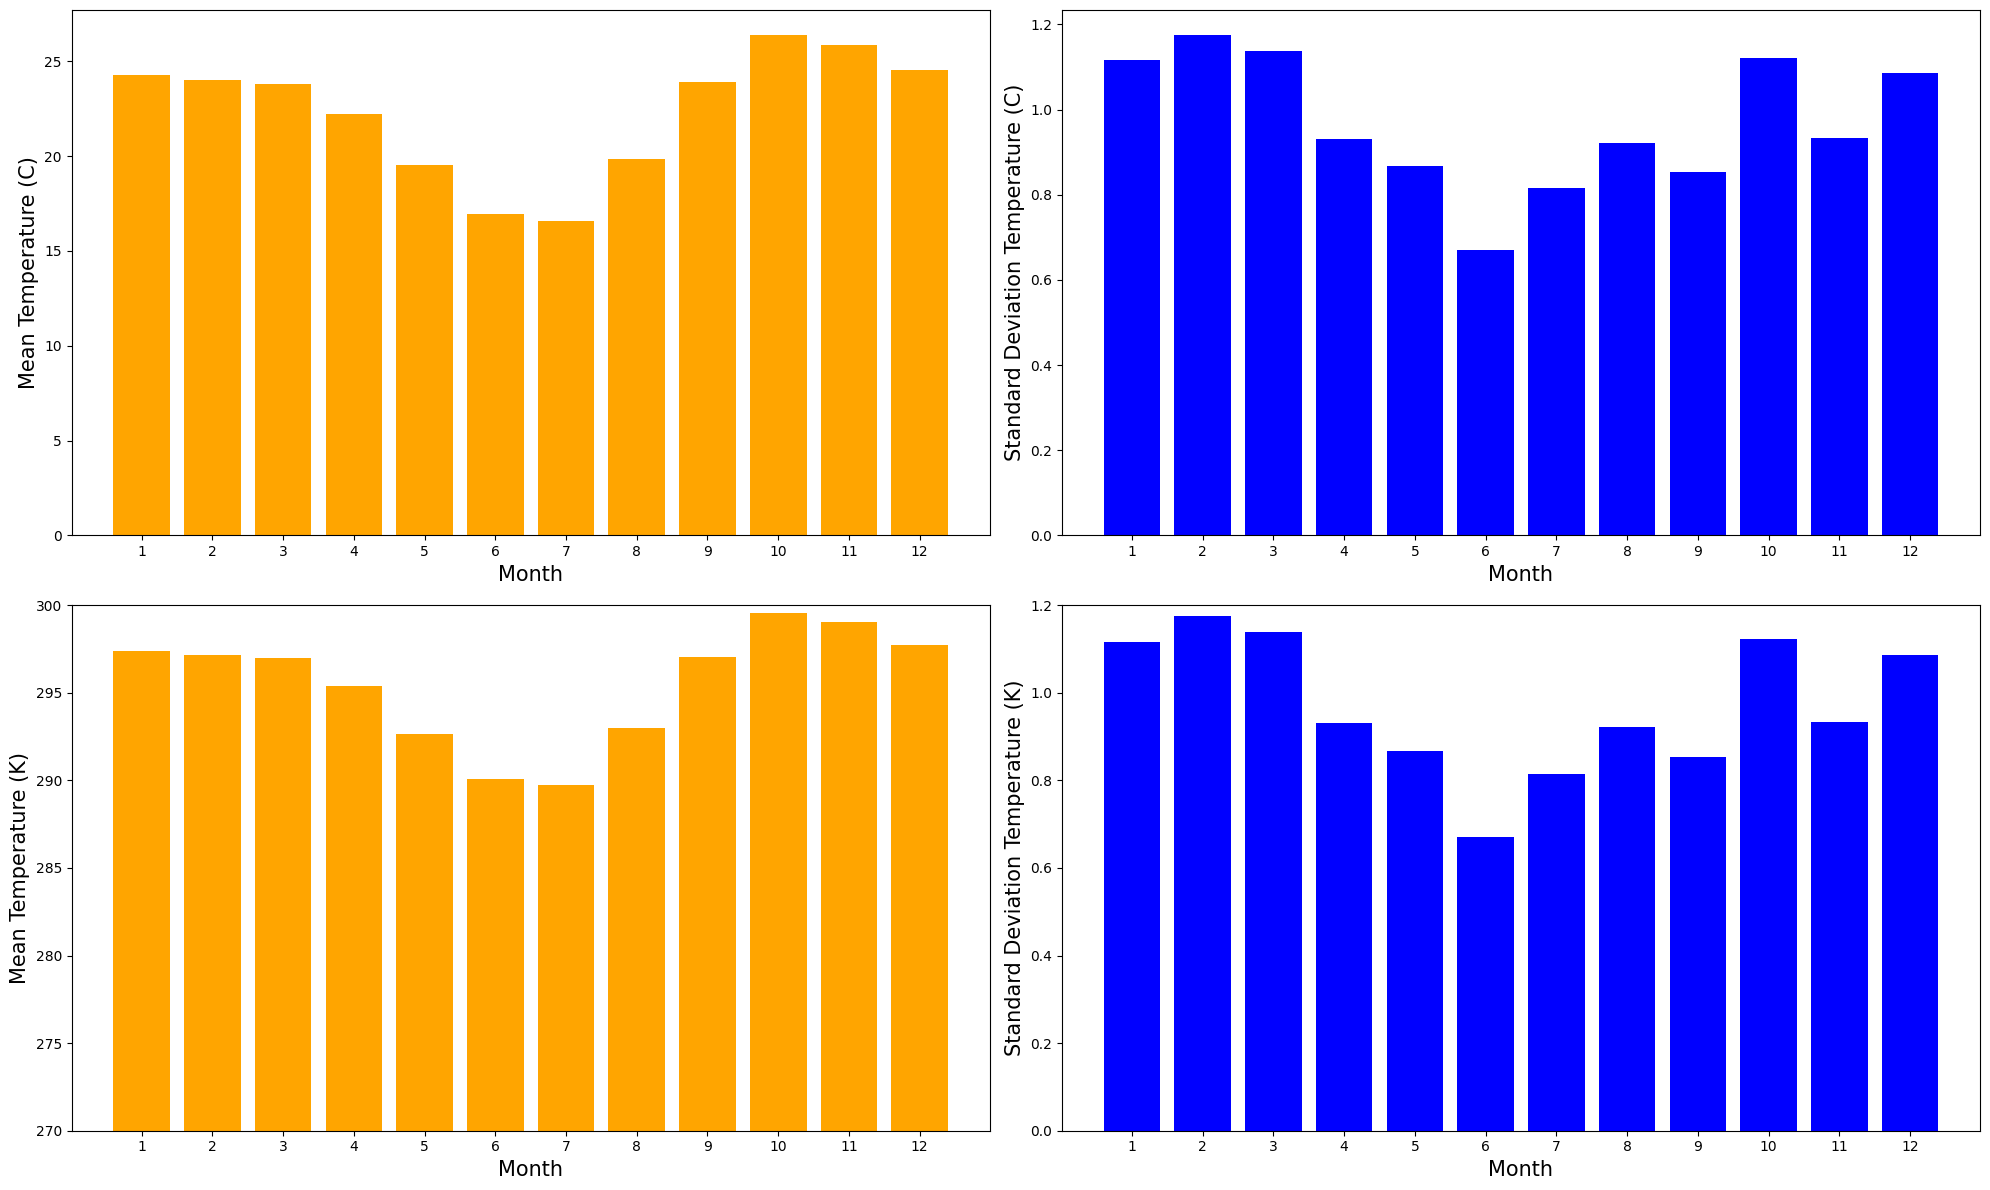

In [286]:
# Group data by month and calculate mean and standard deviation for temperature in Celsius
monthly_mean_temp_C = df_temp.groupby('Month')['Temperature (C)'].mean()
monthly_std_temp_C = df_temp.groupby('Month')['Temperature (C)'].std()

# Group data by month and calculate mean and standard deviation for temperature in Kelvin
monthly_mean_temp_K = df_temp.groupby('Month')['Temperature (K)'].mean()
monthly_std_temp_K = df_temp.groupby('Month')['Temperature (K)'].std()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20,12))

# Plot mean temperature for each month in Celsius
axs[0, 0].bar(monthly_mean_temp_C.index, monthly_mean_temp_C, color='orange')
axs[0, 0].set_xlabel('Month', fontsize=15)
axs[0, 0].set_ylabel('Mean Temperature (C)', fontsize=15)
axs[0, 0].set_xticks(range(1, 13))  # Ensure all months are shown on x-axis

# Plot standard deviation of temperature for each month in Celsius
axs[0, 1].bar(monthly_std_temp_C.index, monthly_std_temp_C, color='blue')
axs[0, 1].set_xlabel('Month', fontsize=15)
axs[0, 1].set_ylabel('Standard Deviation Temperature (C)', fontsize=15)
axs[0, 1].set_xticks(range(1, 13))  # Ensure all months are shown on x-axis

# Plot mean temperature for each month in Kelvin
axs[1, 0].bar(monthly_mean_temp_K.index, monthly_mean_temp_K, color='orange')
axs[1, 0].set_xlabel('Month', fontsize=15)
axs[1, 0].set_ylabel('Mean Temperature (K)', fontsize=15)
axs[1, 0].set_xticks(range(1, 13))  # Ensure all months are shown on x-axis
axs[1, 0].set_ylim(270, 300)  # Set y-axis limits to be between 270 and 300

# Plot standard deviation of temperature for each month in Kelvin
axs[1, 1].bar(monthly_std_temp_K.index, monthly_std_temp_K, color='blue')
axs[1, 1].set_xlabel('Month', fontsize=15)
axs[1, 1].set_ylabel('Standard Deviation Temperature (K)', fontsize=15)
axs[1, 1].set_xticks(range(1, 13))  # Ensure all months are shown on x-axis
axs[1, 1].set_ylim(0, 1.2)  # Set y-axis limits to be between 0 and 30

plt.tight_layout()
plt.show()

In [287]:
cvk = monthly_std_temp_K / monthly_mean_temp_K
cvc = monthly_std_temp_C / monthly_mean_temp_C

print(cvk)
print(cvc)

Month
9     0.002869
10    0.003745
11    0.003120
12    0.003647
1     0.003751
2     0.003954
3     0.003833
4     0.003154
5     0.002964
6     0.002310
7     0.002812
8     0.003146
Name: Temperature (K), dtype: float64
Month
9     0.035645
10    0.042516
11    0.036050
12    0.044211
1     0.045980
2     0.048956
3     0.047778
4     0.041927
5     0.044434
6     0.039585
7     0.049140
8     0.046452
Name: Temperature (C), dtype: float64


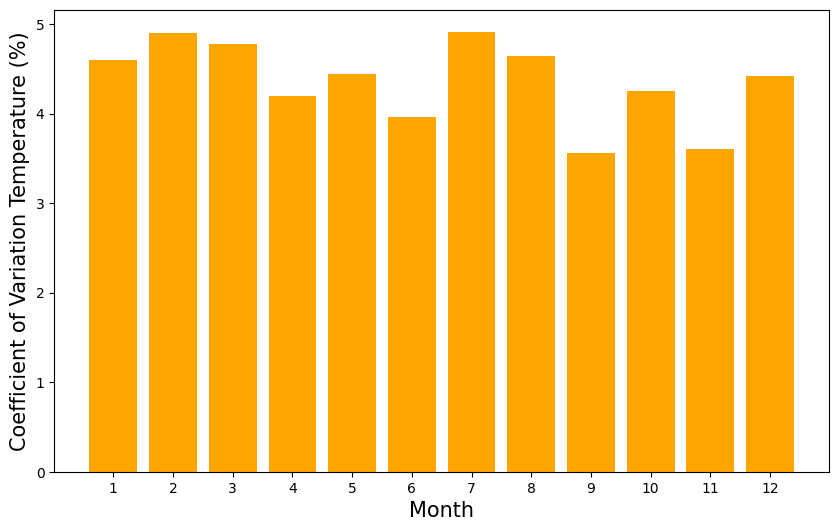

In [288]:
# Create a new figure
plt.figure(figsize=(10,6))

# Plot cvk for each month in percentage
plt.bar(cvc.index, cvc * 100, color='orange')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Coefficient of Variation Temperature (%)', fontsize=15)
plt.xticks(range(1, 13))  # Ensure all months are shown on x-axis

plt.show()

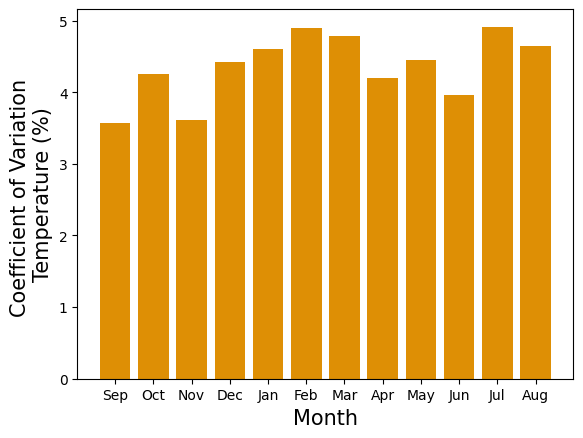

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

# Use the "colorblind" palette from Seaborn
sns.set_palette("colorblind")

# Assume that cvc is already defined and contains the necessary data

# Reorder the months to start in September and end in August
months_order = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
cvc.index = pd.Categorical(cvc.index, categories=months_order, ordered=True)
cvc = cvc.sort_index()

# Choose an orange color suitable for colorblind individuals
color_blind_palette = sns.color_palette("colorblind")
orange_color = color_blind_palette[1]  # Orange suitable for colorblind individuals

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart with error bars and set the color of the bars
bars = ax.bar(range(len(months_order)), cvc.values * 100, color=orange_color, capsize=4)

# Set the x-ticks for each month
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(months_order)

# Set the axis labels
plt.xlabel('Month', fontsize=15)
plt.ylabel('Coefficient of Variation \nTemperature (%)', fontsize=15)

# Show the plot
plt.show()

In [290]:
import pandas as pd

# Convert the data to numeric if necessary
dfNotPumped = dfNotPumped.apply(pd.to_numeric, errors='coerce')
df_rain = df_rain.apply(pd.to_numeric, errors='coerce')
df_temp = df_temp.apply(pd.to_numeric, errors='coerce')  # Ensure that df_temp is defined

# Aggregate dfNotPumped by year and month
dfNotPumped['YearMonth'] = dfNotPumped['Year'].astype(str) + '-' + dfNotPumped['Month'].astype(str).str.zfill(2)
dfNotPumped_agg = dfNotPumped.groupby('YearMonth').mean().reset_index()

# Create a YearMonth column in df_rain
df_rain['YearMonth'] = df_rain['Year'].astype(str) + '-' + df_rain['Month'].astype(str).str.zfill(2)
df_rain_agg = df_rain.groupby('YearMonth').mean().reset_index()

# Create a YearMonth column in df_temp
df_temp['YearMonth'] = df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str).str.zfill(2)
df_temp_agg = df_temp.groupby('YearMonth').mean().reset_index()

# Merge the aggregated DataFrames
combined_df = pd.merge(dfNotPumped_agg[['YearMonth', 'MeanFreq_NP']], df_rain_agg[['YearMonth', 'Rain (m)']], on='YearMonth', how='outer')
combined_df = pd.merge(combined_df, df_temp_agg[['YearMonth', 'Temperature (C)']], on='YearMonth', how='outer')

# Convert YearMonth to datetime for resampling
combined_df['YearMonth'] = pd.to_datetime(combined_df['YearMonth'], format='%Y-%m', errors='coerce')

# Check for NaT values after conversion
if combined_df['YearMonth'].isna().sum() > 0:
    raise ValueError("Some YearMonth values are not in the correct format")

# Resample to ensure all data is aligned by date
combined_df = combined_df.set_index('YearMonth').resample('M').mean()

# Check the shape of the combined DataFrame
print(combined_df)

            MeanFreq_NP  Rain (m)  Temperature (C)
YearMonth                                         
1985-01-31          NaN     0.204           23.355
1985-02-28          NaN     0.130           22.842
1985-03-31          NaN     0.052           23.737
1985-04-30          NaN     0.013           21.780
1985-05-31          NaN     0.005           18.801
...                 ...       ...              ...
2022-07-31     0.271882       NaN              NaN
2022-08-31     0.254658       NaN              NaN
2022-09-30     0.159664       NaN              NaN
2022-10-31     0.095466       NaN              NaN
2022-11-30     0.106918       NaN              NaN

[455 rows x 3 columns]


In [291]:
# Remove rows that do not have values in MeanFreq_NP and Rain (m)
combined_df = combined_df.dropna(subset=['MeanFreq_NP', 'Rain (m)'])

# Check the shape of the combined DataFrame after removing rows
print(combined_df)

            MeanFreq_NP  Rain (m)  Temperature (C)
YearMonth                                         
1986-04-30     0.508772     0.127           20.928
1986-05-31     0.465839     0.001           18.163
1986-11-30     0.106250     0.073           24.499
1986-12-31     0.314607     0.096           24.204
1987-01-31     0.329897     0.093           25.072
...                 ...       ...              ...
2019-12-31     0.150000     0.072           27.166
2020-02-29     0.474576     0.128           23.926
2020-04-30     0.322884     0.005           23.073
2020-05-31     0.226788     0.000           19.655
2020-06-30     0.151607     0.000           16.940

[198 rows x 3 columns]


In [292]:
print(combined_df)

            MeanFreq_NP  Rain (m)  Temperature (C)
YearMonth                                         
1986-04-30     0.508772     0.127           20.928
1986-05-31     0.465839     0.001           18.163
1986-11-30     0.106250     0.073           24.499
1986-12-31     0.314607     0.096           24.204
1987-01-31     0.329897     0.093           25.072
...                 ...       ...              ...
2019-12-31     0.150000     0.072           27.166
2020-02-29     0.474576     0.128           23.926
2020-04-30     0.322884     0.005           23.073
2020-05-31     0.226788     0.000           19.655
2020-06-30     0.151607     0.000           16.940

[198 rows x 3 columns]


C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\675414557.py:45: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  month_index = (int(row['Month']) + 2) % 12  # Offset to start in October
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\675414557.py:50: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ecolor='gray', elinewidth=1, capsize=3, label=month_names[int(row['Month'])], markersize=7, zorder=5)
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\675414557.py:53: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(row['Month']) in [5, 6, 7, 8, 9, 10]:  # May to August, September, and October
C:\Users\Bastien\AppData\Local\Temp\ipykernel_3680\675414557.py:59: FutureWarning: Calling int on a single eleme

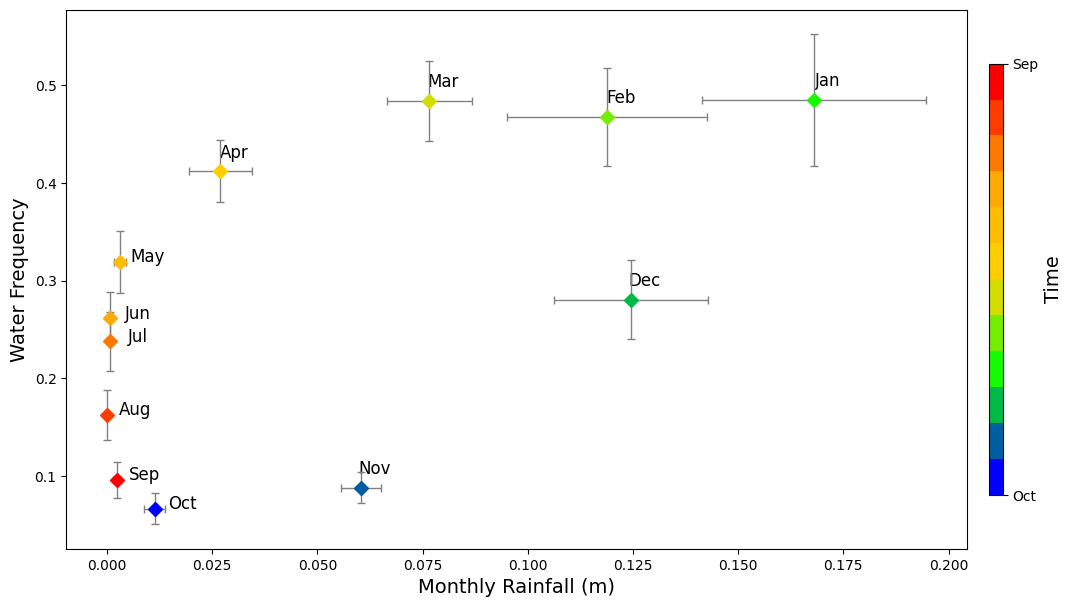

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.patches as mpatches

# Ensure the data is well-prepared
# combined_df should contain the columns 'MeanFreq_NP', 'Rain (m)', and 'Month'

# Create a copy of the DataFrame to avoid modifying the original
filtered_df = combined_df.copy()

# Extract the month from the dates
filtered_df['Month'] = filtered_df.index.month

# Filter rows with missing values in critical columns
filtered_df = filtered_df.dropna(subset=['Rain (m)', 'MeanFreq_NP'])

# Create a custom color palette ranging from blue to red through green and yellow
colors = ["#0000FF", "#00FF00", "#FFD700", "#FFA500", "#FF0000"]  # Blue, Green, Golden Yellow, Orange, Red
n_bins = 12  # Discretize the palette into 12 colors for each month
cmap_name = 'custom_blue_green_yellow_orange_red'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Define a single marker for all months
marker = 'D'  # Use a diamond shape for all points

# Dictionary of month abbreviations
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Calculate the means and standard errors for each month
monthly_stats = filtered_df.groupby('Month')[['Rain (m)', 'MeanFreq_NP']].agg(['mean', 'sem']).reset_index()

# Create the plot with a defined size
fig, ax = plt.subplots(figsize=(14, 7))

# Add central points for the monthly clusters with error bars
for i, row in monthly_stats.iterrows():
    mean_rain = row[('Rain (m)', 'mean')]
    mean_freq = row[('MeanFreq_NP', 'mean')]
    sem_rain = row[('Rain (m)', 'sem')]
    sem_freq = row[('MeanFreq_NP', 'sem')]
    
    # Use the color from the palette for the corresponding month
    month_index = (int(row['Month']) + 2) % 12  # Offset to start in October
    month_color = custom_cmap(month_index / 11)  # Use the custom palette based on the month
    
    # Add a central point for the cluster with a different shape
    ax.errorbar(mean_rain, mean_freq, xerr=sem_rain, yerr=sem_freq, fmt=marker, color=month_color, 
                 ecolor='gray', elinewidth=1, capsize=3, label=month_names[int(row['Month'])], markersize=7, zorder=5)
    
    # Adjust the label offset for the months of May to August, September, and October
    if int(row['Month']) in [5, 6, 7, 8, 9, 10]:  # May to August, September, and October
        xytext = (20, 0)  # Offset to the right at the same height
    else:
        xytext = (10, 10)
    
    # Add an annotation for the month with an offset to avoid overlapping with the error bars
    ax.annotate(month_names[int(row['Month'])], 
                 (mean_rain, mean_freq), 
                 textcoords="offset points", 
                 xytext=xytext,  # Define the label offset
                 ha='center', 
                 fontsize=12,  # Increase the font size of the labels
                 color='black')  # Write the labels in black

# Add labels in English with a larger font size
ax.set_xlabel('Monthly Rainfall (m)', fontsize=14)
ax.set_ylabel('Water Frequency', fontsize=14)

# Add a continuous color bar to represent time
norm = Normalize(vmin=1, vmax=12)
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

# Add the color bar with an arrow
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.8)
cbar.set_label('Time', fontsize=14)
cbar.set_ticks([1, 12])
cbar.set_ticklabels(['Oct', 'Sep'])  # Correct the labels to indicate the correct direction

# Add an arrow to indicate the direction of time
arrow = mpatches.FancyArrowPatch((1.05, 0.9), (1.05, 0.1), transform=ax.transAxes, 
                                 color='black', arrowstyle='->', mutation_scale=15)
ax.add_patch(arrow)

# Show the plot
plt.show()